### Bayesian Regression

In **Ridge Regression** one has to choose the appropriate value of the regularization parameter $\lambda$. Usually such choice is made by cross validation. **Bayesian Regression** provides an automatic method of estimating regularization parameter $\lambda$ from data. In this notebook we will demonstrate that power of **Bayesian Regression**. To begin lets recap probabilistic interpretation of **Least Squares Regression**.

Say we have data $\{y_i, x_i\}$, lets assume $y_i$ is given as $y_i = w^T x_i + \epsilon_i$ in vector notation we have $y = w^Tx + \epsilon$, where $\epsilon \sim \mathcal{N}(0, \sigma^2)$. 

Lets write $p(y|w^Tx, \sigma^2) = \prod_{i=1}^{N}p(y_i|w^Tx_i,\sigma^2)$, where $p(y|w^Tx, \sigma^2)$ is the conditional probability of observing $y$ given inputs $x$, weights $w$ and $\sigma^2$. We also assume that all the samples $y_i$ are IID. Now since $w^Tx_i$ is constant,
$p(y_i|w^Tx_i,\sigma^2) = \mathcal{N}(y_i|w^Tx_i, \sigma^2)$.

Hence now $p(y|w^Tx, \sigma^2) = \prod_{i=1}^{N}\mathcal{N}(y_i|w^Tx_i, \sigma^2) = \mathcal{L}$. Lets take log of both sides
$\text{log}(p(y|w^Tx, \sigma^2) = \sum_{i=1}^N \text{log}(\mathcal{N}(y_i|w^Tx_i, \sigma^2)) = \text{log}(\mathcal{L})$, we have to find $w$ and $\sigma$ such that log likelyhood function is maximized. Putting $\mathcal{N}(y_i|w^Tx_i, \sigma^2) = \frac{1}{\sigma \sqrt{2\pi}}\text{exp}^{-\frac{(y_i-w^Tx_i)^2}{2\sigma^2}}$, we get $\mathcal{L} = -N \text{log}(\sigma) - \frac{N}{2} \text{log} (2 \pi) - \sum_{i=1}^{N} \frac{(y_i - w^Tx_i)^2}{2\sigma^2}$. The partial of $\mathcal{L}$ w.r.t. $w^T$ is given as $\frac{\partial \mathcal{L}}{\partial w^T} = \frac{\sum_{i=1}^{N} x_i(y_i-w^Tx_i)}{\sigma^2}$. Setting it to zero we get the *Normal equation*, $w_{ML} = (X^TX)^{-1}(X^Ty)$.

We can also calculate maximum likelyhood estimate of $\sigma$, $\frac{\partial \mathcal{L}}{\partial \sigma} = -\frac{N}{\sigma} + \frac{\sum_{i=1}^{N}(y_i-w^Tx_i)^2}{\sigma^3}$, setting to zero we get $\sigma_{ML}^2 = \frac{\sum_{i=1}^{N}(y_i - w^Tx_i)^2}{N}$.

In **Least Square** or **Maximum Likelyhood estimation** what we have done is found set of weights which maximize the probability of observing a set of data.

Now lets ask a more direct question what is the probability of having a set of parameters $w$ given data, or what is $p(w|y,x,\sigma^2)$ ? We can answer this question using **Baye's theorem**. Baye's rules says $p(w|y,x,\sigma^2) \propto  p(y|w,x,\sigma^2)p(w)$, where $p(w)$ is called *prior*, $p(y|w,x,\sigma^2)$ is called *likelyhood* and $p(w|y,x,\sigma^2)$ is called *posterior*. Lets assume $p(w)$ is given as $\mathcal{N}(w|0, \alpha^2)$. Then $p(w|y,x,\sigma^2) \propto (\prod_{i=1}^N \mathcal{N}(y_i|w^Tx_i, \sigma^2)) \mathcal{N}(w|0, \alpha^2)$. Take log of both sides we get, $\text{log}(p(w|y,x,\sigma^2) \propto (\sum_{i=1}^{N} \text{log}(\mathcal{N}(y_i|w^Tx_i, \sigma^2)) )+ \text{log}(\mathcal{N}(w|0, \alpha^2))$. Which is same as $\text{log}(p(w|y,x,\sigma^2) \propto \frac{\sum_{i=1}^{N}(y_i - w^Tx_i)^2}{2\sigma^2} + \frac{w^Tw}{2\alpha^2}$. This loss function is very similar to loss function of **Ridge regression**. Also **Ridge regression** regularization parameter $\lambda = \frac{\sigma^2}{\alpha^2}$. 

Now next question to ask is $p(y_{test}|y_{train},\alpha^2,\sigma^2)$? What is the probability of observing a data point $y_{test}$ given what we have seen in $y_{train}$. This is given by the formula

$p(y_{test}|y_{train}, \alpha^2, \sigma^2) = \int p(y_{test}|w^Tx_{test}, \sigma^2)p(w|y_{train}, \alpha^2, \sigma^2)dw$. This is the multiplication of *Likelyhood* with *Posterior* of $w$. Now lets show some of these ideas by an example.

Lets assume $y = 0.3 - 0.5 x + \mathcal{N}(0, 0.1)$, We will generate data from this model and would try to estimate the coefficients ($w$, 0.3 and -0.5) using **Bayesian Technique** above. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Make the sheet width 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>" ))

Text(0, 0.5, 'Y')

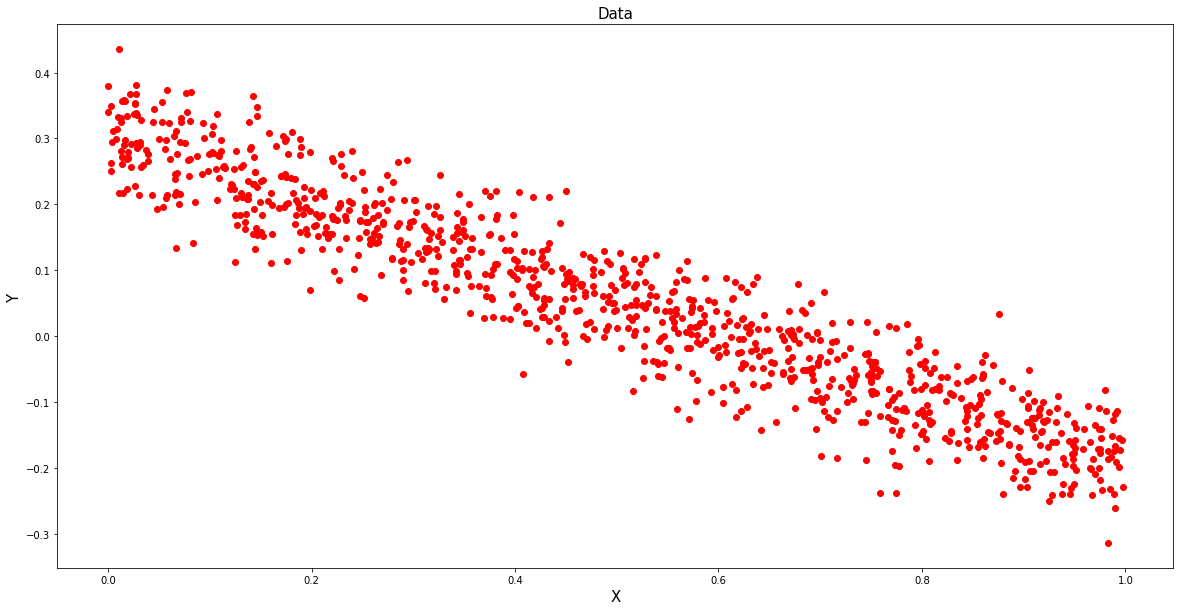

In [2]:
np.random.seed(1)
NSamples = 1000
x = np.random.uniform(0, 1, size=(NSamples))
sigma = 0.05
sigma2 = sigma**2
epsilon = np.random.randn(NSamples) * (sigma)
y = 0.3 - 0.5 * x + epsilon
plt.figure(figsize=(20,10))
plt.plot(x, y, 'ro')
plt.title('Data', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)

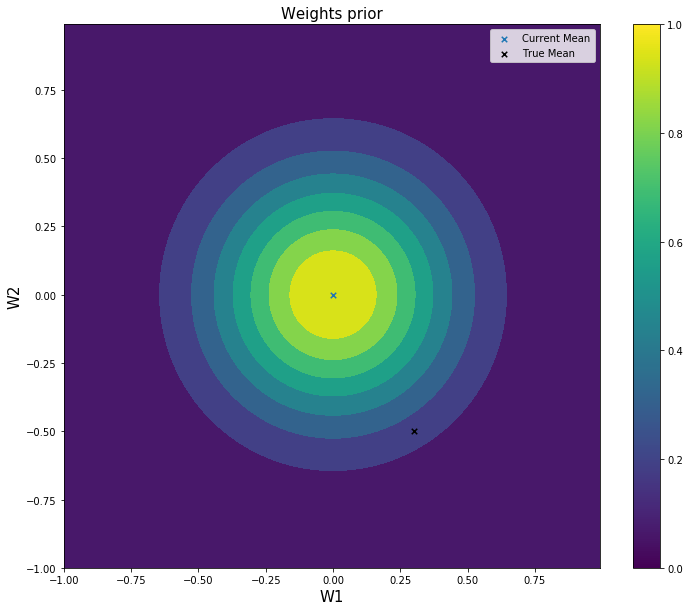

In [3]:
from scipy.stats import multivariate_normal
def plotWDist(m, S, tag):
    x = np.arange(-1,1,0.01)
    y = np.arange(-1,1,0.01)
    xv, yv = np.meshgrid(x, y)
    D = S.shape[0]
    pos = np.dstack((xv, yv))
    rv = multivariate_normal(m, S)
    z = rv.pdf(pos)
    plt.figure(figsize=(12,10))
    plt.contourf(xv, yv, z)
    plt.xlabel('W1', fontsize=15)
    plt.ylabel('W2', fontsize=15)
    plt.title('Weights ' + tag, fontsize=15)
    plt.scatter([m[0]], [m[1]], label='Current Mean', s=30, marker='x')
    plt.scatter([0.3], [-0.5], label='True Mean', s=30, marker='x', color='black')
    plt.legend()
    plt.colorbar()
    
## Lets start with assuming weights are zero with variance 0.1
m = np.array([0,0])
alpha2 = 0.1
S = np.eye(2,2)*alpha2
plotWDist(m, S, 'prior')

xSoFar = np.array([])
ySoFar = []
ms = [m]
Ss = [S]
for (count, (xi, yi)) in enumerate(zip(x, y)):
    if xSoFar.shape[0] > 0 :
        xSoFar = np.vstack([xSoFar, np.array([1, xi])])
    else:
        xSoFar = np.array([1, xi]).reshape(1,2)
    ySoFar.append(yi)
    SInv = np.linalg.inv(S)
    SNInv = SInv + np.matmul(xSoFar.T, xSoFar)/sigma2
    S = np.linalg.inv(SNInv)
    m = np.matmul(S,(np.matmul(SInv,m) + np.matmul(xSoFar.T, ySoFar)/sigma2))
    ms.append(m)
    Ss.append(S)

Coef=-0.5005, Intercept=0.303


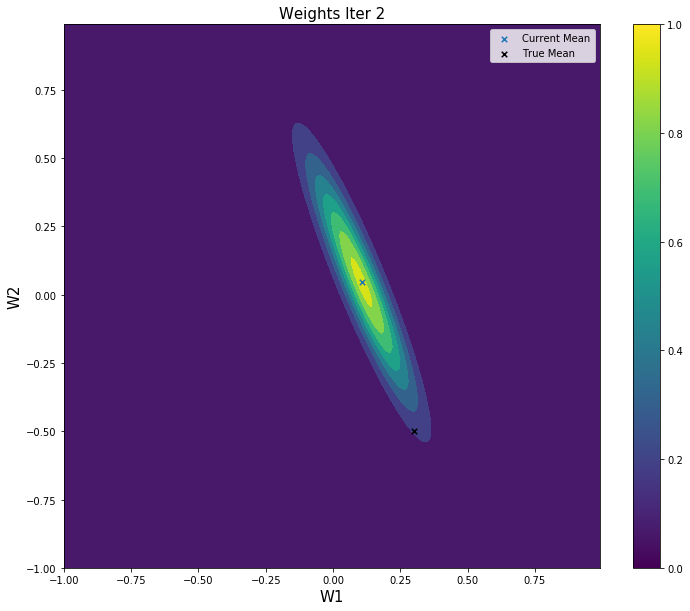

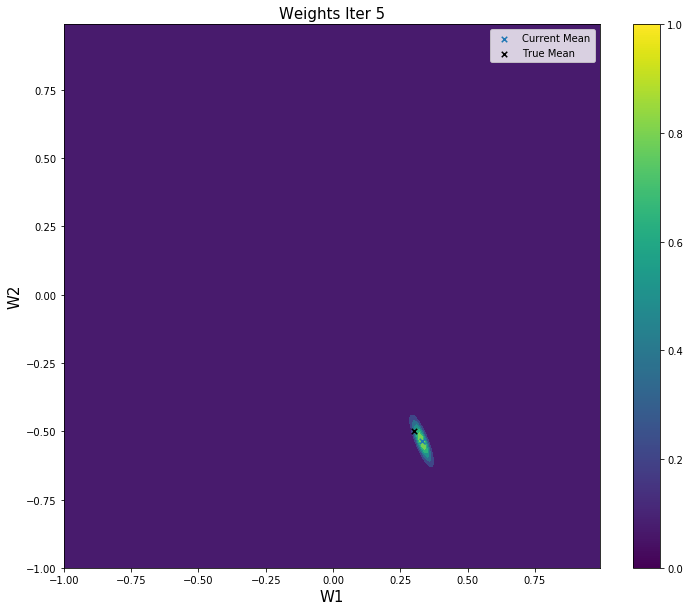

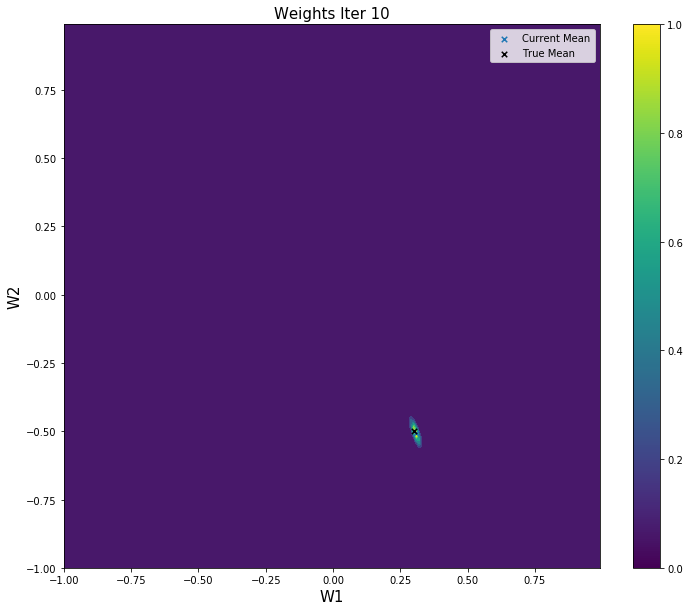

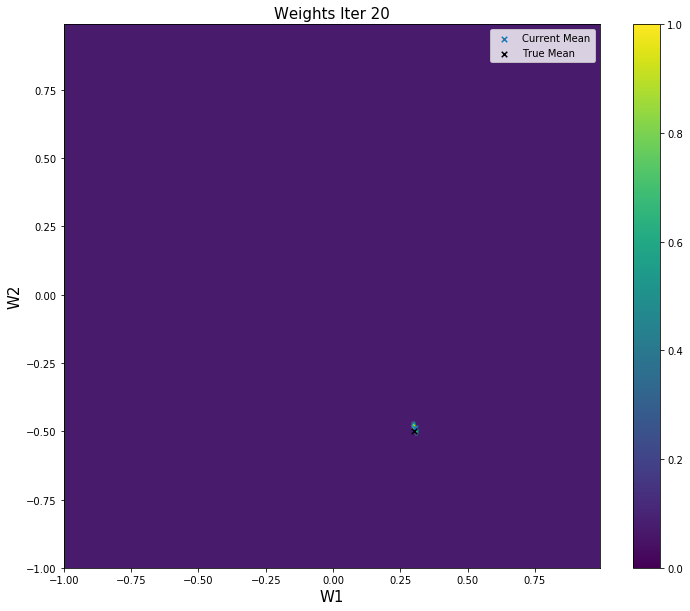

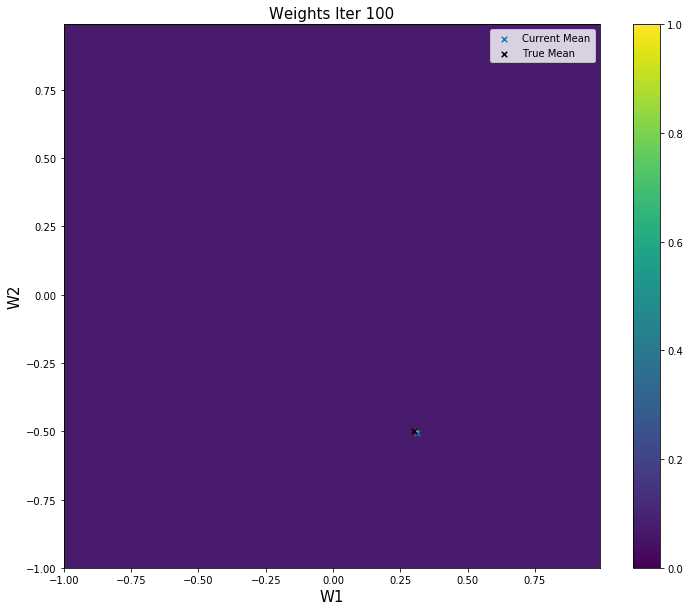

In [4]:
#Now lets plot the distrubution of weights after 1, 5, 10 iterations and 100 iterations
plotWDist(ms[1], Ss[1], 'Iter 2')
plotWDist(ms[5], Ss[5], 'Iter 5')
plotWDist(ms[10], Ss[10], 'Iter 10')
plotWDist(ms[20], Ss[20], 'Iter 20')
plotWDist(ms[100], Ss[100], 'Iter 100')

print(f"Coef={ms[1000][1] :.4}, Intercept={ms[1000][0] :.4}")

#### From the above plots we can see as we get more and more data our confidence in our estimate of w gets high and w converges to the true values


In [5]:
## Now lets use Bayesian regression method of sklearn
from sklearn.linear_model import BayesianRidge
clf = BayesianRidge()
clf.fit(x.reshape(x.shape[0],1), y)
print(f"Coeff={clf.coef_[0]:.4},Intercept={clf.intercept_:.4}")
print(f"Estimated sigma={(1/clf.alpha_)**0.5:.4}")

Coeff=-0.4994,Intercept=0.3021
Estimated sigma=0.05094
